In [155]:
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append("../HW6/")
import PLLT_LiftDistribution as PLLT

In [156]:
time = np.linspace(0, 122.73, 10)
print("Times to analyze:", time)
weight = np.array([1220-t*0.44 for t in time.copy()])
for i in range(len(weight)):
    print("Weight at {0:.2f} min: {1:.0f} lb".format(time[i], weight[i]))

starAoA = np.array([9.28,9.21,9.12,9.03,8.95,8.9,8.83,8.72,8.62,8.58])

Times to analyze: [  0.          13.63666667  27.27333333  40.91        54.54666667
  68.18333333  81.82        95.45666667 109.09333333 122.73      ]
Weight at 0.00 min: 1220 lb
Weight at 13.64 min: 1214 lb
Weight at 27.27 min: 1208 lb
Weight at 40.91 min: 1202 lb
Weight at 54.55 min: 1196 lb
Weight at 68.18 min: 1190 lb
Weight at 81.82 min: 1184 lb
Weight at 95.46 min: 1178 lb
Weight at 109.09 min: 1172 lb
Weight at 122.73 min: 1166 lb


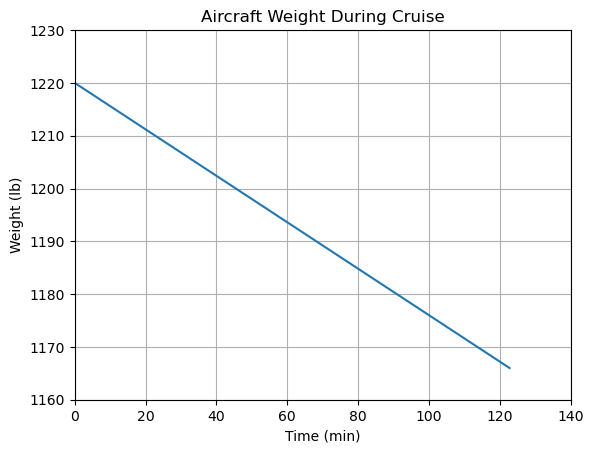

In [157]:
# plot of weight over time
plt.plot(time, weight)
plt.xlabel("Time (min)")
plt.ylabel("Weight (lb)")
plt.ylim([1160, 1230])
plt.xlim([0, 140])
plt.grid()
plt.title("Aircraft Weight During Cruise")
plt.show()

In [158]:
# get all the PLLTs
Airfoil = "4412"
a0 = np.degrees(PLLT.TAFT(Airfoil)[0])
b = 10.74
c = 1.544
S = b*c
Vinf = 33.53

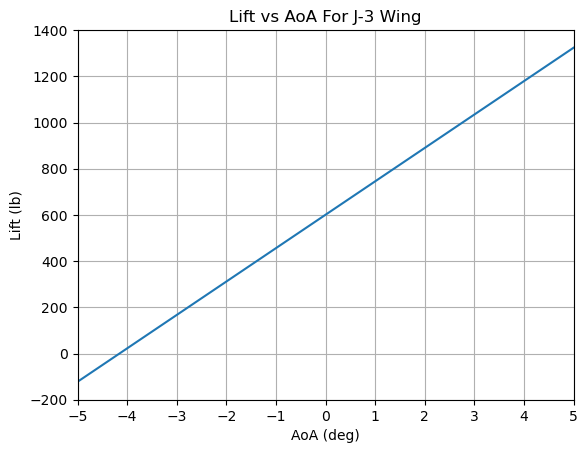

In [159]:
# find lift for aoa
aoas = np.arange(-5, 5.5, 0.5)
lift = np.array([0.5*0.9093*(33.53**2)*S*PLLT.LiftDistribution(a, a0, b, c, Vinf, S)[2]/4.448 for a in aoas.copy()])
plt.plot(aoas, lift)
plt.xlabel("AoA (deg)")
plt.ylabel("Lift (lb)")
plt.xlim([-5, 5])
plt.xticks(np.arange(-5, 6, 1))
plt.ylim([-200, 1400])
plt.grid()
plt.title("Lift vs AoA For J-3 Wing")
# plt.plot(aoas, a*aoas+b)
plt.show()

AoA at 0.00 min: 4.28 deg
AoA at 13.64 min: 4.24 deg
AoA at 27.27 min: 4.20 deg
AoA at 40.91 min: 4.16 deg
AoA at 54.55 min: 4.12 deg
AoA at 68.18 min: 4.08 deg
AoA at 81.82 min: 4.03 deg
AoA at 95.46 min: 3.99 deg
AoA at 109.09 min: 3.95 deg
AoA at 122.73 min: 3.91 deg


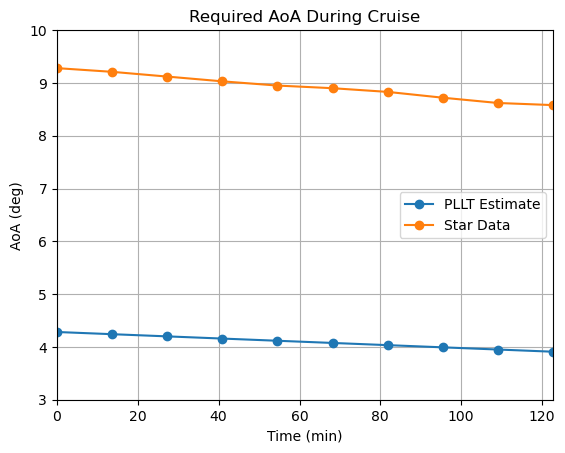

In [160]:
# polyfit lift
ap, bp = np.polyfit(aoas.copy(), lift.copy(), 1)        # lift = a*aoa + b

# determine aoa at each location
predaoas = np.array([(weight[i]-bp)/ap for i in range(len(weight))])
for i in range(len(predaoas)):
    print("AoA at {0:.2f} min: {1:.2f} deg".format(time[i], predaoas[i]))

plt.plot(time, predaoas, "-o", label="PLLT Estimate")
plt.plot(time, starAoA, "-o", label="Star Data")
plt.xlabel("Time (min)")
plt.ylabel("AoA (deg)")
plt.title("Required AoA During Cruise")
plt.xlim([0, 122.73])
plt.ylim([3, 10])
plt.legend(loc="center right")
plt.grid()
plt.show()

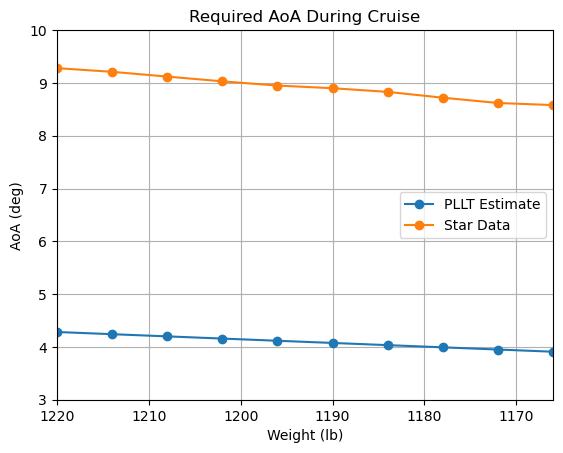

In [161]:
plt.plot(weight, predaoas, "-o", label="PLLT Estimate")
plt.plot(weight, starAoA, "-o", label="Star Data")
plt.xlabel("Weight (lb)")
plt.ylabel("AoA (deg)")
plt.title("Required AoA During Cruise")
plt.xlim([1220, 1166])
plt.ylim([3, 10])
plt.legend(loc="center right")
plt.grid()
plt.show()

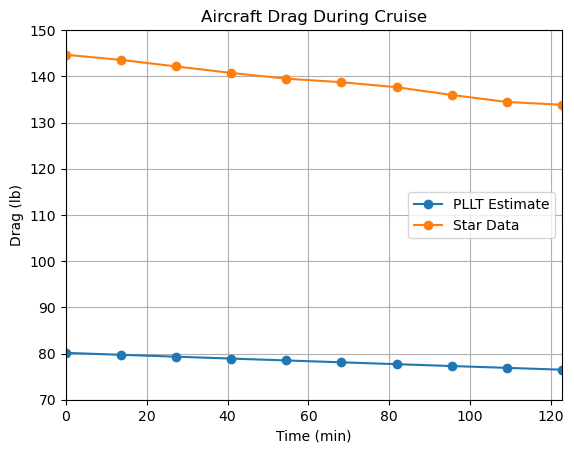

In [164]:
CLs = np.array([PLLT.LiftDistribution(a, a0, b, c, Vinf, S)[2] for a in starAoA.copy()])
CLspred = np.array([PLLT.LiftDistribution(a, a0, b, c, Vinf, S)[2] for a in predaoas.copy()])
Cds = 0.5*0.9093*(33.53**2)*S/4.448*np.array([0.02 + (cl**2)/(np.pi*6.96*0.85) for cl in CLs.copy()])
Cdspred = 0.5*0.9093*(33.53**2)*S/4.448*np.array([0.02 + (cl**2)/(np.pi*6.96*0.85) for cl in CLspred.copy()])
plt.plot(time, Cdspred, "-o", label="PLLT Estimate")
plt.plot(time, Cds, "-o", label="Star Data")
plt.grid()
plt.xlim([0, 122.73])
plt.legend(loc="center right")
plt.xlabel("Time (min)")
plt.ylabel("Drag (lb)")
plt.ylim([70, 150])
plt.title("Aircraft Drag During Cruise")
plt.show()